# Install Dependencies

In [ ]:
!pip install tensorflow==2.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.

In [ ]:
! pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 8.5 MB/s eta 0:00:00


In [ ]:
!mkdir /content/yolov8n2
%cd /content/yolov8n2
!pip install roboflow

/content/yolov8n2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Suc

In [ ]:
!pip install roboflow

# Import Libraries

In [ ]:
import yaml
import os
from roboflow import Roboflow
from ultralytics import YOLO

# Import Dataset

In [ ]:
rf = Roboflow(api_key="m186I1g2YEwaRaneXHv4")
project = rf.workspace("capstone-iaon3").project("capstone-2-0v1tu")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to capstone-2-1 in yolov8:: 100%|██████████| 7842/7842 [00:01<00:00, 6953.27it/s]


# Yaml config

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- Egg
- Tomato
- Zucchini
- almond
- apple
- banana
- broccoli
- butter
- cabbage
- carrot
- cauliflower
- cheese
- cherry
- chili
- coconut
- cucumber
- dark-chocolate
- eggplant
- grape
- kiwi
- mango
- melon
- orange
- pear
- pineapple
- pomegranate
- potato
- strawberry
- wallnut
- watermelon
- white-chocolate
nc: 31
roboflow:
  license: CC BY 4.0
  project: capstone-2-0v1tu
  url: https://universe.roboflow.com/capstone-iaon3/capstone-2-0v1tu/dataset/1
  version: 1
  workspace: capstone-iaon3
test: ../test/images
train: capstone-2-1/train/images
val: capstone-2-1/valid/images


In [ ]:
# define number of classes based on YAML
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

# Set root directory

In [ ]:
root = '/content/yolov8n2/capstone-2-1'

# Train The model

In [ ]:
# Load a model
model = YOLO("yolov8m.pt")  # build a new model from scratch

# Use the model
results = model.train(data=os.path.join(root, "data.yaml"), epochs=150)  # train the model


100%|██████████| 49.7M/49.7M [00:00<00:00, 378MB/s]


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/yolov8n2/capstone-2-1/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

train: Scanning /content/yolov8n2/capstone-2-1/train/labels.cache... 3114 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3114/3114 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/000047_jpg.rf.3a840e1c0651f3be2d581844f0bf0288.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/1146_jpg.rf.c107a712981574a5a169b0cac53b3b10.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/20_jpg.rf.a55b4e8b0dda96ca312e7b93513a2078.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/272_jpg.rf.17f9e3bf337234687600b461fbd91819.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/274_jpg.rf.68030360789d019a1506f26f62c044d0.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/322_jpg.rf.97594b1a001bd676aa8539c64ec903fa.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/yolov8n2/capstone-2-1/train/images/336_jpg.rf.94d1f65b2dcbc13fd45f61842ff8a6fa.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/yolo


val: Scanning /content/yolov8n2/capstone-2-1/valid/labels.cache... 448 images, 0 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 40, len(boxes) = 1044. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.38G      1.118      3.062      1.506         61        640: 100%|██████████| 195/195 [01:42<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        448       1044      0.437      0.484      0.456      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      7.86G      1.018      2.179      1.383        146        640: 100%|██████████| 195/195 [01:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.569      0.554      0.603      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       7.9G       1.01      2.013      1.384        112        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.539      0.537      0.554      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      7.89G      1.011      1.896      1.382         50        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.602       0.59      0.617      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      7.86G     0.9874      1.768      1.365         76        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.684      0.648      0.706      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      7.83G     0.9619      1.679      1.351         98        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.634      0.688      0.717      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      7.93G     0.9362      1.609      1.331         68        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        448       1044      0.692      0.667      0.727       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      7.89G     0.9161       1.54      1.317         80        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.734      0.605      0.709      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      7.84G     0.9088      1.476      1.307        129        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        448       1044      0.765      0.685      0.735       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      7.82G     0.8879      1.433      1.303         68        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.681      0.756      0.775      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      7.81G     0.8666      1.395      1.289         61        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.707      0.713      0.779      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      7.83G     0.8639      1.349      1.273         99        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.704       0.75      0.782      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      7.86G     0.8528      1.316      1.275        102        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.729      0.787      0.817      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      7.89G     0.8444      1.276      1.265        100        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044        0.7      0.759      0.786      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      7.91G     0.8386      1.251      1.263        114        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044       0.83      0.729       0.83      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      7.87G     0.8309      1.215      1.259         79        640: 100%|██████████| 195/195 [01:40<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.744      0.775      0.813      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      7.76G     0.8136      1.187      1.246         85        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.758      0.757      0.805       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       7.8G     0.8113      1.179      1.243         87        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.753      0.812      0.844      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      7.89G     0.8051      1.138      1.235         90        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.739      0.776      0.818      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      7.88G     0.7976      1.105      1.231         75        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.825      0.727      0.826       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       7.9G     0.7923      1.099      1.231         76        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]

                   all        448       1044      0.808      0.795      0.857      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      7.79G     0.7851      1.087      1.224        114        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.817      0.787      0.855      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      7.86G     0.7638      1.049      1.206         75        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.802        0.8      0.859      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      7.78G     0.7606      1.038      1.206        105        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.834       0.74      0.842      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      7.87G     0.7692      1.023      1.207         72        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.793      0.777      0.837      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       7.8G     0.7531       1.01      1.204         66        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.783      0.786      0.851      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      7.89G     0.7595     0.9909      1.208         96        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.814      0.807      0.863      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      7.83G     0.7346     0.9788      1.192         91        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.814      0.783      0.847      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      7.86G      0.736      0.959      1.187         91        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.836      0.795      0.866       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      7.88G     0.7295     0.9712      1.185         86        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.819      0.814      0.864      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      7.85G     0.7273     0.9286      1.183        126        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.782      0.846      0.883      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      7.88G     0.7186     0.9235      1.184         78        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.827      0.792      0.852      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      7.93G      0.724      0.922      1.176         80        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.841      0.784       0.87      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      7.81G     0.7112     0.8967      1.168         72        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.808      0.822      0.867      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      7.87G     0.7061     0.8622      1.163         94        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.822      0.821      0.871      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      7.93G       0.71     0.8719      1.167         79        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.849      0.795      0.884      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      7.89G     0.6897     0.8645      1.155         75        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.833      0.827      0.885      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      7.88G     0.6958     0.8709      1.163         92        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.834      0.837      0.882      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      7.85G      0.691     0.8504      1.155         88        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.809      0.829      0.867      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      7.82G     0.6793      0.855      1.152         68        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.862      0.802      0.874      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      7.86G     0.6879     0.8198      1.144         79        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.811      0.835       0.88      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      7.85G     0.6748     0.8227      1.146         69        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.833      0.788      0.858      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       7.9G      0.667     0.8083      1.145         63        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.811      0.814      0.869      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      7.89G     0.6641      0.784      1.137         87        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.847      0.824      0.881      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      7.89G     0.6741     0.8077      1.142         73        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.858      0.832       0.89      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      7.78G     0.6521     0.7727      1.127        115        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.819       0.84      0.889      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      7.94G     0.6525     0.7799      1.128         73        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.835      0.842      0.884      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      7.93G     0.6394     0.7663      1.124         85        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.841      0.821      0.867      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      7.84G     0.6387       0.75      1.121         81        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.799      0.834       0.87      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       7.8G     0.6406     0.7541       1.12         97        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.853      0.819      0.884      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      7.86G     0.6414     0.7532      1.121         65        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.887      0.796      0.888       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      7.91G     0.6354     0.7285      1.114         94        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.868      0.809      0.879      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      7.91G     0.6369     0.7358      1.117        107        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.866      0.804      0.883      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      7.85G     0.6333     0.7201      1.117         77        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.839      0.832      0.888      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      7.86G      0.621     0.7227      1.104         99        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044       0.85      0.822      0.875      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      7.86G     0.6115     0.7013      1.102         64        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.848      0.841      0.894        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      7.89G     0.6111     0.7072      1.104         89        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.812      0.848      0.877       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150       7.8G     0.6051     0.6949      1.101         96        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044       0.86      0.831      0.885      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      7.86G     0.6105     0.6944      1.101         90        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044       0.87      0.805      0.881      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      7.88G     0.6051     0.6787      1.093         73        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.855       0.81      0.883      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      7.82G     0.5945     0.6788      1.091         88        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044       0.84      0.835      0.874      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      7.89G     0.5995     0.6767      1.097         64        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.844      0.824      0.882      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      7.92G     0.5895     0.6637      1.086         84        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.832      0.837      0.888      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      7.94G     0.5912     0.6549      1.091         94        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.849      0.827      0.881      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      7.94G     0.5874     0.6575      1.087        118        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.875      0.814      0.887      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      7.86G     0.5839     0.6476      1.081         85        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044       0.85      0.837      0.887      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      7.85G     0.5806     0.6429      1.082         65        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.833      0.862      0.891      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      7.87G     0.5775     0.6335       1.08         65        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.873      0.828      0.886      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      7.89G     0.5744     0.6279      1.073         62        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044       0.86      0.817      0.881      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      7.79G     0.5733     0.6091      1.074         72        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.819      0.853      0.888      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      7.87G     0.5637     0.6318      1.074         65        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.857      0.829      0.892      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      7.91G     0.5708     0.6106      1.074         71        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.853      0.842      0.895      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      7.84G     0.5628     0.6089      1.066         65        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.861      0.821      0.889      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      7.84G     0.5503     0.5957      1.064         80        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.842      0.845      0.886      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      7.82G     0.5507     0.5927      1.064        105        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.849      0.831      0.893      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      7.89G     0.5576     0.5987      1.068         95        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.874      0.838      0.896      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150       7.8G     0.5417     0.5784      1.055         77        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044       0.86      0.816       0.89      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      7.87G     0.5459     0.5884       1.06        105        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044       0.87      0.839      0.901      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       7.8G     0.5445     0.5867      1.056        109        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.863      0.836      0.889      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      7.93G     0.5463     0.5877      1.059        129        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.841       0.85      0.893      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      7.83G      0.541     0.5762      1.053         73        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044       0.87      0.833      0.889        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      7.85G     0.5382     0.5819      1.056        131        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        448       1044      0.868      0.845      0.892      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      7.94G     0.5301     0.5635      1.045         95        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.843      0.844      0.884      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      7.86G      0.518     0.5614      1.044        104        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.853      0.844      0.892      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      7.79G     0.5277     0.5611      1.048        157        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.845      0.831       0.89      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      7.78G     0.5201     0.5361      1.042         82        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.867      0.812      0.873       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      7.85G     0.5225     0.5491      1.047         46        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.845      0.836      0.889      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      7.94G     0.5163     0.5547      1.045         99        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.842      0.867      0.889      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      7.89G     0.5208     0.5487      1.046        122        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.864      0.838      0.884      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      7.86G     0.5075      0.531      1.039         76        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.855      0.849      0.896      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      7.86G     0.5143     0.5301      1.038         60        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.867       0.84      0.885      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      7.84G     0.5057     0.5258      1.026         66        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.853      0.839      0.897      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      7.89G     0.5052     0.5248      1.034         88        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.859      0.846       0.89      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      7.89G     0.5015     0.5309      1.034         89        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.841      0.836      0.886      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      7.89G     0.5004     0.5234      1.029        104        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.864      0.846        0.9      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      7.87G     0.5061     0.5141      1.029         80        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.859      0.854      0.895      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      7.88G     0.4971     0.5141      1.025        104        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.877      0.811      0.885        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      7.87G     0.4936     0.5076      1.028         88        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044       0.88      0.824      0.886      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      7.86G     0.4901     0.5025      1.019         74        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.867      0.831      0.897       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      7.88G     0.4828     0.4934      1.018         78        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.871      0.843      0.901      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       7.8G     0.4796     0.4888      1.014         81        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.873      0.853      0.897      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      7.79G     0.4786     0.4959      1.016        109        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

                   all        448       1044      0.901      0.815      0.899      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      7.92G     0.4828     0.4957      1.017        121        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.873      0.834      0.895      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      7.83G     0.4793     0.4874      1.018         46        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044       0.86      0.853      0.901       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      7.87G     0.4709     0.4767      1.011         77        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.862      0.844      0.885      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      7.85G     0.4692     0.4749      1.012         85        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.876      0.841      0.902       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      7.85G     0.4661     0.4786      1.013         64        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        448       1044      0.897      0.814      0.892      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      7.88G     0.4631      0.471      1.008         61        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.877      0.827      0.891      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      7.85G     0.4644     0.4716       1.01        115        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.869      0.847      0.889       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      7.92G      0.461     0.4612      1.006         55        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.882      0.823      0.891      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      7.89G     0.4615     0.4653      1.009        118        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.874      0.817      0.884      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      7.91G     0.4606     0.4658      1.006         88        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.877      0.819      0.889      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      7.85G     0.4631      0.454      1.007         87        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.859       0.85      0.893      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      7.92G      0.449     0.4543     0.9982         64        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.854      0.852      0.895      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      7.91G      0.464     0.4605      1.008         54        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.838      0.867      0.897      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      7.87G     0.4486     0.4488     0.9992         77        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.852      0.858      0.897      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      7.87G     0.4409     0.4416     0.9924         94        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.883      0.827      0.895       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      7.86G     0.4521     0.4486     0.9961         74        640: 100%|██████████| 195/195 [01:39<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.884       0.84      0.899      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      7.91G     0.4399      0.442     0.9945         76        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.886      0.834      0.897      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      7.87G     0.4387     0.4332     0.9901         98        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.877      0.825      0.894      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      7.86G     0.4392      0.436     0.9942         78        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.856      0.838      0.891      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      7.88G     0.4398     0.4327      0.988         79        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.864       0.84      0.891      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      7.94G     0.4407     0.4374     0.9929         81        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.884      0.827      0.885      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      7.42G     0.4383     0.4301     0.9891         51        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.889      0.819      0.895      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      7.82G      0.433     0.4256     0.9849        118        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.881      0.835      0.898      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      7.84G     0.4325     0.4278     0.9931         66        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.848      0.857      0.894      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      7.84G     0.4236     0.4173     0.9803        120        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.888      0.821      0.897      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      7.73G     0.4262     0.4225     0.9853         82        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        448       1044      0.868      0.837      0.893      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      7.84G     0.4208     0.4124     0.9816        101        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.891      0.815      0.892       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      7.86G     0.4236     0.4227     0.9858         82        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.892      0.833      0.896      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      7.89G     0.4227     0.4145     0.9826         75        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.877      0.835       0.89      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      7.95G     0.4198     0.4165     0.9764        152        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044       0.88      0.835       0.89      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150       7.9G      0.422     0.4129     0.9853        106        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.889      0.814       0.89      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      7.88G     0.4132     0.4079     0.9774         45        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.881      0.832      0.891      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      7.77G     0.4215     0.4133     0.9834         69        640: 100%|██████████| 195/195 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.879      0.836       0.89      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      7.89G     0.4056     0.3921     0.9713         94        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.867      0.845      0.895      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      7.81G     0.4119     0.4017     0.9809         52        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.883      0.828      0.892      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      7.88G     0.4057     0.3961     0.9736         78        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

                   all        448       1044      0.863      0.847      0.894      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      7.84G     0.4013     0.3966     0.9717         99        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.875      0.843      0.893      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       7.9G     0.4015     0.3899     0.9731         87        640: 100%|██████████| 195/195 [01:39<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.858      0.853      0.894      0.711


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      7.93G     0.3632     0.2846     0.9437         47        640: 100%|██████████| 195/195 [01:40<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.879      0.843      0.891      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      7.89G     0.3519     0.2627     0.9314         36        640: 100%|██████████| 195/195 [01:38<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.867      0.835      0.889      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      7.91G     0.3466     0.2655     0.9327         48        640: 100%|██████████| 195/195 [01:38<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.873      0.838      0.889      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      7.93G      0.342     0.2562     0.9287         42        640: 100%|██████████| 195/195 [01:38<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.871      0.847      0.888      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       7.9G      0.337     0.2539     0.9302         43        640: 100%|██████████| 195/195 [01:38<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]

                   all        448       1044      0.877      0.832      0.888       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      7.89G     0.3354     0.2504     0.9265         46        640: 100%|██████████| 195/195 [01:38<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044      0.864      0.845       0.89      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      7.91G     0.3331     0.2482     0.9245         49        640: 100%|██████████| 195/195 [01:38<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.872      0.832      0.887      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      7.77G     0.3309      0.247     0.9199         37        640: 100%|██████████| 195/195 [01:39<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.863      0.848       0.89      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150       7.9G     0.3322     0.2484     0.9281         37        640: 100%|██████████| 195/195 [01:38<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        448       1044      0.867      0.852      0.891      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       7.8G     0.3268     0.2427     0.9176         61        640: 100%|██████████| 195/195 [01:38<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        448       1044       0.87      0.846      0.891      0.713



150 epochs completed in 4.487 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.1MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25857709 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.54it/s]


                   all        448       1044      0.874      0.839      0.902       0.72
                   Egg        448         16      0.969          1      0.995      0.907
                Tomato        448         15      0.973          1      0.995      0.939
              Zucchini        448         15      0.687      0.732      0.707      0.386
                almond        448        131      0.737      0.747      0.789      0.446
                 apple        448         28      0.919       0.81      0.955      0.852
                banana        448         26      0.867      0.731       0.89      0.571
              broccoli        448         16      0.647      0.625      0.686      0.349
                butter        448         24      0.738      0.708      0.834      0.628
               cabbage        448         15      0.983      0.933      0.978      0.941
                carrot        448         30      0.964      0.884      0.949      0.799
           cauliflowe

# Export Model To TFlite

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
results = model.val()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolov8n2/capstone-2-1/valid/labels.cache... 448 images, 0 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 40, len(boxes) = 1044. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:13<00:00,  2.10it/s]


                   all        448       1044      0.875       0.84      0.901       0.72
                   Egg        448         16      0.969          1      0.995      0.914
                Tomato        448         15      0.973          1      0.995      0.939
              Zucchini        448         15      0.687      0.733      0.707      0.382
                almond        448        131      0.737      0.747      0.788      0.446
                 apple        448         28      0.919       0.81      0.955      0.852
                banana        448         26      0.874      0.731      0.889      0.571
              broccoli        448         16      0.645      0.625      0.686      0.341
                butter        448         24      0.738      0.704      0.834      0.625
               cabbage        448         15      0.983      0.933      0.978      0.934
                carrot        448         30      0.964       0.88      0.951        0.8
           cauliflowe

In [ ]:
results = model.export(format='tflite')

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 35, 8400) (49.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: simplifying with onnxsim 0.4.35...
ONNX: export success ✅ 9.3s, saved as 'runs/detect/train3/weights/best.onnx' (98.8 MB)
TensorFlow SavedModel: running 'onnx2tf -i "runs/detect/train3/weights/best.onnx" -o "runs/detect/train3/weights/best_saved_model" -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 27.4s, saved as 'runs/detect/train3/weights/best_saved_model' (247.2 MB)

TensorFlow Lite: starting export with tensorflow 2.13.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/train3/weights/best_saved_model/best_float32.tflite' (98.8 MB)

Export complete (29.5s)
Results saved to /content/yolov8n2/runs/detect/trai

# Save All File To Drive

In [ ]:
import locale

def getpreferredencoding(do_setlocale=True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding


In [ ]:
!cp -r "/content/yolov8n2/runs" "/content/drive/MyDrive/yolo_v8_model3"

In [ ]:
model = YOLO("/content/yolov8n2/runs/detect/train3/weights/best.pt")

In [ ]:
import cv2

conf_thresh = 0.1
hide_conf = True
img = cv2.imread('/content/download (2).jpeg')
results = model.predict(img, stream=True, conf=conf_thresh)

# Test The Yolo Model

In [ ]:
for result in results:
  boxes = result.boxes.cpu().numpy() # get boxes on cpu in numpy
  for box in boxes: # iterate boxes
    r = box.xyxy[0].astype(int) # get corner points as int
    print(r) # print boxes
    cv2.rectangle(img, r[:2], r[2:], (0,255,0), 2) # draw boxes on img


[218 122 258 159]
[ 74  69 117 108]
[238  74 286 122]
[115  36 146  70]
[145  62 177  94]
[279  68 297 101]
[101   5 136  35]
[128   0 173  30]
[128  93 172 135]
0: 384x640 5 apples, 2 kiwis, 2 oranges, 93.6ms
Speed: 1.6ms preprocess, 93.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


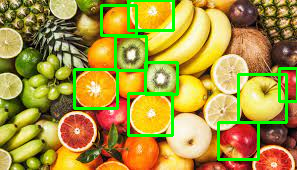

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# TFlite Model Test


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

In [ ]:

class LetterBox:
    """Resize image and padding for detection, instance segmentation, pose."""

    def __init__(self, new_shape=(640, 640), auto=False, scaleFill=False, scaleup=True, stride=32):
        """Initialize LetterBox object with specific parameters."""
        self.new_shape = new_shape
        self.auto = auto
        self.scaleFill = scaleFill
        self.scaleup = scaleup
        self.stride = stride

    def __call__(self, labels=None, image=None):
        """Return updated labels and image with added border."""
        if labels is None:
            labels = {}
        img = labels.get('img') if image is None else image
        shape = img.shape[:2]  # current shape [height, width]
        new_shape = labels.pop('rect_shape', self.new_shape)
        if isinstance(new_shape, int):
            new_shape = (new_shape, new_shape)

        # Scale ratio (new / old)
        r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
        if not self.scaleup:  # only scale down, do not scale up (for better val mAP)
            r = min(r, 1.0)

        # Compute padding
        ratio = r, r  # width, height ratios
        new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
        dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
        if self.auto:  # minimum rectangle
            dw, dh = np.mod(dw, self.stride), np.mod(dh, self.stride)  # wh padding
        elif self.scaleFill:  # stretch
            dw, dh = 0.0, 0.0
            new_unpad = (new_shape[1], new_shape[0])
            ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

        dw /= 2  # divide padding into 2 sides
        dh /= 2
        if labels.get('ratio_pad'):
            labels['ratio_pad'] = (labels['ratio_pad'], (dw, dh))  # for evaluation

        if shape[::-1] != new_unpad:  # resize
            img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
        top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
        left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
        img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                 value=(114, 114, 114))  # add border

        if len(labels):
            labels = self._update_labels(labels, ratio, dw, dh)
            labels['img'] = img
            labels['resized_shape'] = new_shape
            return labels
        else:
            return img


In [ ]:
def xywh2xyxy(x):
    """
    Convert bounding box coordinates from (x, y, width, height) format to (x1, y1, x2, y2) format where (x1, y1) is the
    top-left corner and (x2, y2) is the bottom-right corner.

    Args:
        x (np.ndarray | torch.Tensor): The input bounding box coordinates in (x, y, width, height) format.
    Returns:
        y (np.ndarray | torch.Tensor): The bounding box coordinates in (x1, y1, x2, y2) format.
    """
    y = np.copy(x)
    y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
    y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
    y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
    y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
    return y

In [ ]:
def scale_boxes(img1_shape, boxes, img0_shape, ratio_pad=None):
    """
    Rescales bounding boxes (in the format of xyxy) from the shape of the image they were originally specified in
    (img1_shape) to the shape of a different image (img0_shape).

    Args:
      img1_shape (tuple): The shape of the image that the bounding boxes are for, in the format of (height, width).
      boxes (torch.Tensor): the bounding boxes of the objects in the image, in the format of (x1, y1, x2, y2)
      img0_shape (tuple): the shape of the target image, in the format of (height, width).
      ratio_pad (tuple): a tuple of (ratio, pad) for scaling the boxes. If not provided, the ratio and pad will be
                         calculated based on the size difference between the two images.

    Returns:
      boxes (torch.Tensor): The scaled bounding boxes, in the format of (x1, y1, x2, y2)
    """
    if ratio_pad is None:  # calculate from img0_shape
        gain = min(img1_shape[0] / img0_shape[0], img1_shape[1] / img0_shape[1])  # gain  = old / new
        pad = round((img1_shape[1] - img0_shape[1] * gain) / 2 - 0.1), round(
            (img1_shape[0] - img0_shape[0] * gain) / 2 - 0.1)  # wh padding
    else:
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]

    boxes[..., [0, 2]] -= pad[0]  # x padding
    boxes[..., [1, 3]] -= pad[1]  # y padding
    boxes[..., :4] /= gain
    clip_boxes(boxes, img0_shape)
    return boxes

In [ ]:
def predict_image_labels(image_path, model_path):
    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path)
    interpreter.allocate_tensors()

    # Preprocess the image
    im = [LetterBox(640, auto=False, stride=32)(image=cv2.imread(image_path))]
    im = np.stack(im)
    im = im[..., ::-1].transpose((0, 1, 2, 3))  # BGR to RGB, BHWC to BCHW, (n, 3, h, w)
    im = np.ascontiguousarray(im)  # contiguous
    im = im.astype(np.float32)
    im /= 255

    # Set input tensor
    input_details = interpreter.get_input_details()
    interpreter.set_tensor(input_details[0]['index'], im)

    # Run inference
    interpreter.invoke()

    # Process output data
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Post-process output_data to get predictions
    nc = 0
    conf_thres = 0.05
    bs = output_data.shape[0]
    nc = nc or (output_data.shape[1] - 4)
    nm = output_data.shape[1] - nc - 4
    mi = 4 + nc
    xc = np.amax(output_data[:, 4:mi], 1) > conf_thres

    multi_label = False
    multi_label &= nc > 1

    prediction = np.transpose(output_data, (0, -1, -2))
    prediction[..., :4] = xywh2xyxy(prediction[..., :4])
    output = [np.zeros((0, 6 + nm))] * bs

    max_nms = 30000
    agnostic = False
    max_wh = 7680
    iou_thres = 0.45
    max_det = 300

    for xi, x in enumerate(prediction):
        x = x[xc[xi]]

        if not x.shape[0]:
            continue

        box = x[:, :4]
        cls = x[:, 4:4 + nc]
        mask = x[:, 4 + nc:4 + nc + nm]

        conf = np.max(cls, axis=1, keepdims=True)
        j = np.argmax(cls, axis=1, keepdims=True)

        x = np.concatenate((box, conf, j.astype(float), mask), axis=1)

        conf_flat = conf.flatten()
        filtered_x = x[conf_flat > conf_thres]

        n = filtered_x.shape[0]

        if not n:
            continue
        if n > max_nms:
            sorted_indices = np.argsort(x[:, 4])[::-1]
            x = x[sorted_indices[:max_nms]]

        c = x[:, 5:6] * (0 if agnostic else max_wh)
        boxes, scores = x[:, :4] + c, x[:, 4]
        i = cv2.dnn.NMSBoxes(boxes, scores, score_threshold=0.4, nms_threshold=iou_thres)
        i = i[:max_det]
        output[xi] = x[i]

    results = []
    class_names = [
        "Egg", "Tomato", "Zucchini", "Almond", "Apple", "Banana", "Broccoli",
        "Butter", "Cabbage", "Carrot", "Cauliflower", "Cheese", "Cherry",
        "Chili", "Coconut", "Cucumber", "Dark-Chocolate", "Eggplant", "Grape",
        "Kiwi", "Mango", "Melon", "Orange", "Pear", "Pineapple", "Pomegranate",
        "Potato", "Strawberry", "Wallnut", "Watermelon", "White-Chocolate"
    ]

    for result in output:
        for detection in result:
            _, _, _, _, conf, class_id = detection
            class_name = class_names[int(class_id)]
            results.append({"class_name": class_name, "confidence": conf})

    return results

In [ ]:
# Example usage
model_path = model_path='/content/yolov8n2/runs/detect/train3/weights/best_saved_model/best_float16.tflite'
image_path = "/content/download (6).jpeg"
predicted_labels = predict_image_labels(image_path, model_path)

# Print the predicted labels
for label in predicted_labels:
    print(f"{label['class_name']}: {label['confidence']:.2f}")

Banana: 0.92
Pineapple: 0.92
